In [48]:
import numpy as np
nocc = np.array([7,19,27,33,57])
norb = np.array([19,57,81,81,171])
nelec = nocc * 2
homo = np.array([1.04145818327265,0.941321054399579,1.17327305639303,1.49467849772248,1.15940107067744]) * 27.211407953
lumo = np.array([2.32324526529525,1.61290226225429,1.76507494680552,1.95423926066296,1.49137634066145]) * 27.211407953
gap = lumo - homo
emf = np.array([8.49148146743777,21.53163181418185,30.739217512531816,40.7630419205324,74.3578692478307]) * 27.211407953
mp2_corr = np.array([-0.374488385441918,-1.33946303889623,-1.48820669679913,-2.50661558108095,-7.59833019825399]) * 27.211407953
ccsd_corr = np.array([-0.2764994195487197,-0.8717641419494275,-1.166448460269267,-1.510069899962567,-3.707447855899951]) * 27.211407953
afqmc = np.array([8.213420,20.640522,29.549186,39.200336,70.428238]) * 27.211407953
afqmc_corr = afqmc - emf
afqmc_err = np.array([0.000132,0.000318,0.000230,0.001394,0.007098]) * 27.211407953
emf_pe = emf / nelec
mp2_corr_pe = mp2_corr / nelec
ccsd_corr_pe = ccsd_corr / nelec
afqmc_corr_pe = afqmc_corr / nelec
afqmc_err_pe = afqmc_err / nelec

In [53]:
print('Nelec \t Norb \t HOMO(eV) \t LUMO(eV) \t E_HF(eV) \t E_corr_MP2 \t E_corr_CCSD \t E_corr_AFQMC_PT')
for i,n in enumerate(nelec):
    print(f'{nelec[i]} \t {norb[i]} \t {homo[i]:.6f} \t {lumo[i]:.6f} \t '
          f'{emf[i]:.6f} \t {mp2_corr[i]:.6f} \t {ccsd_corr[i]:.6f} \t {afqmc_corr[i]:.6f}')

Nelec 	 Norb 	 HOMO(eV) 	 LUMO(eV) 	 E_HF(eV) 	 E_corr_MP2 	 E_corr_CCSD 	 E_corr_AFQMC_PT
14 	 19 	 28.339543 	 63.218775 	 231.065166 	 -10.190356 	 -7.523939 	 -7.566444
38 	 57 	 25.614671 	 43.889341 	 585.906017 	 -36.448675 	 -23.721930 	 -24.248353
54 	 81 	 31.926412 	 48.030174 	 836.457388 	 -40.496200 	 -31.740705 	 -32.382433
66 	 81 	 40.672306 	 53.177602 	 1109.219763 	 -68.208539 	 -41.091128 	 -42.523428
114 	 171 	 31.548936 	 40.582450 	 2023.382315 	 -206.761263 	 -100.884876 	 -106.930799


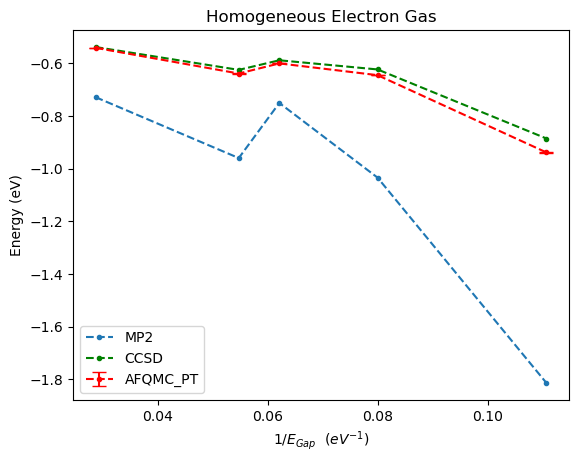

In [37]:
from matplotlib import pyplot as plt
# plt.plot(1/gap,emf_pe,'.-',label='HF')
plt.plot(1/gap,mp2_corr_pe,'.--',label='MP2')
plt.plot(1/gap,ccsd_corr_pe,'.--',color='green',label='CCSD')
plt.errorbar(1/gap,afqmc_corr_pe,yerr=afqmc_err_pe,fmt='.--',capsize=5,color='red',label='AFQMC_PT')
# plt.xticks(1/gap)
plt.xlabel('1/$E_{Gap}$  ($eV^{-1}$)')
plt.ylabel('Energy (eV)')
plt.title('Homogeneous Electron Gas')
plt.legend()
plt.show()

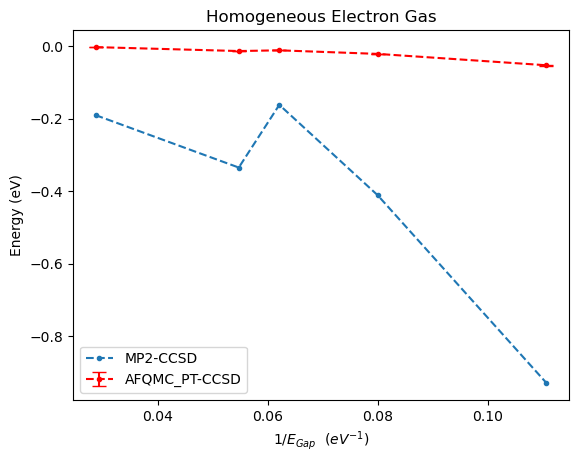

In [35]:
# plt.plot(1/gap,mp2_corr_pe,'.--',label='MP2')
# plt.plot(1/gap,ccsd_corr_pe,'.--',label='CCSD')
plt.plot(1/gap,mp2_corr_pe-ccsd_corr_pe,'.--',label='MP2-CCSD')
plt.errorbar(1/gap,afqmc_corr_pe-ccsd_corr_pe,yerr=afqmc_err_pe,fmt='.--',capsize=5,color='red',label='AFQMC_PT-CCSD')
plt.xlabel('1/$E_{Gap}$  ($eV^{-1}$)')
plt.ylabel('Energy (eV)')
plt.title('Homogeneous Electron Gas')
plt.legend()
plt.show()